In [13]:
%matplotlib inline 
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import json 
from dtcv.pt_lib import transform_point, transform_points,  invert_point

rc_df = pd.read_csv('/tmp/foobar/raw_count_annotations.csv')
rc_df['count'] = rc_df['count'].replace('',1).fillna(1)

f_df = pd.read_csv('/tmp/foobar/file.csv')
t = rc_df.merge(f_df, on='image_url')

tf = pd.read_csv('/tmp/foobar/gcp_transforms.csv')
tf['tf'] = tf.matrix.apply(json.loads)
tf_map = {r.url: np.array(r.tf) for idx, r in tf.iterrows()}

rows = []

for idx, row in t.iterrows():
    url = row.image_url

    if url in tf_map:
        A = tf_map[url]
        p = transform_point(A, invert_point(np.array([row.cx,row.cy])))
        count = int(row['count'] or 1)
        row = [row.neighborhood, row.date, count, row['type'], p[0], p[1]]
        rows.append(row)
        
       
df = pd.DataFrame(rows, columns='neighborhood date count type x y'.split())
df.head()

,neighborhood,date,count,type,x,y
0,columbia,2015-09-25,2,Individual,6.279944e+06,1.842849e+06
1,columbia,2015-09-25,6,Individual,6.279954e+06,1.842689e+06
2,columbia,2015-09-25,6,Individual,6.279948e+06,1.842452e+06
3,columbia,2015-09-25,7,Individual,6.279882e+06,1.842285e+06
4,columbia,2015-09-25,1,Individual,6.278551e+06,1.841903e+06


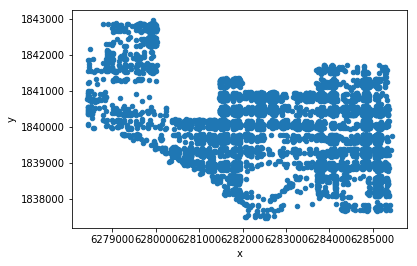

In [2]:
df.plot.scatter('x','y')

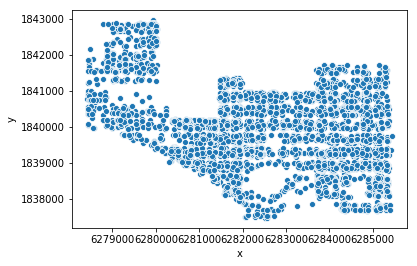

In [3]:
import seaborn as sns
sns.scatterplot(df.x, df.y)

In [4]:
import random

rows = []
for name, row in df.iterrows():
    count = row['count']
    
    for i in range(count):
        rows.append( (row.neighborhood, row.date, row['type'], 
                      row.x+random.normalvariate(0,3), row.y+random.normalvariate(0,3) ))
        
    
dfr = pd.DataFrame(rows, columns='neighborhood date type x y'.split())
    
    

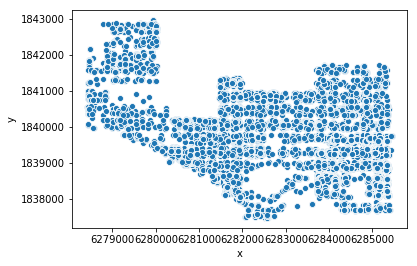

In [5]:
sns.scatterplot(dfr.x, dfr.y)

In [6]:
len(df), len(dfr)

(5598, 21920)

In [7]:
dfr.to_csv('points.csv')

In [8]:
!pwd


/Users/eric/proj/data-projects/downtown-partnership/notebooks
